
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('shopping_trends_updated.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# пропуски в данных
data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [5]:
df = data.copy()

In [6]:
def interpret_anova(p_value, alpha=0.05):
    if p_value < alpha:
        return (f"p-value={p_value:.4f}. Значение p-value ниже уровня значимости (alpha={alpha}).\nОтвергаем нулевую гипотезу об отсутствии статистически значимых различий между группами в пользу альтернативной.")
    else:
        return (f"p-value={p_value:.4f}. Значение p-value выше уровня значимости (alpha={alpha}).\nНулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.")

def interpret_chi2(p_value, alpha=0.05):
    if p_value < alpha:
        return (f"p-value={p_value:.4f}. Значение p-value ниже уровня значимости (alpha={alpha}).\nОтвергаем нулевую гипотезу об отсутствии зависимости между группами в пользу альтернативной.")
    else:
        return (f"p-value={p_value:.4f}. Значение p-value выше уровня значимости (alpha={alpha}).\n Нулевая гипотеза об отсутствии зависимости между группами не отклоняется.")

def interpret_corr(p_value, alpha=0.05):
    if p_value < alpha:
        return (f"p-value={p_value:.4f}. Значение p-value ниже уровня значимости (alpha={alpha}).\nКоэффициент корреляции существенно отличается от нуля: есть линейной корреляция")
    else:
        return (f"p-value={p_value:.4f}. Значение p-value выше уровня значимости (alpha={alpha}).\nКоэффициент корреляции существенно не отличается от нуля: нет линейной корреляции")

**Гипотеза 1**: Существует зависимость между возрастом покупателя `Age` и способом оплаты покупки `Payment Method`.

In [7]:
hyp = df.groupby('Payment Method')['Age'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 0.2849, p-value: 0.9216
p-value=0.9216. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


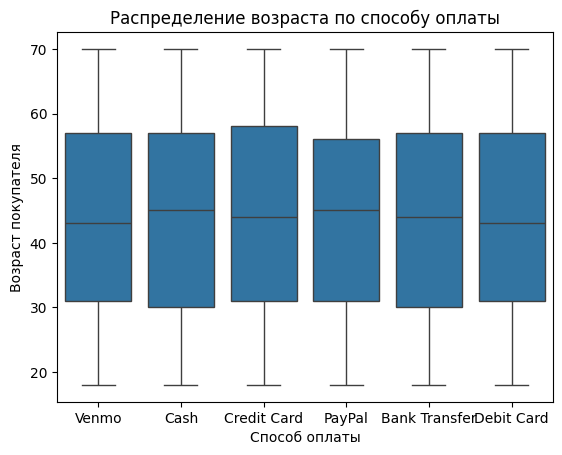

In [8]:
sns.boxplot(x='Payment Method', y='Age', data=df)
plt.title('Распределение возраста по способу оплаты')
plt.ylabel('Возраст покупателя')
plt.xlabel('Способ оплаты')
plt.show()

**Вывод**: Нет статистически значимой зависимости между способом оплаты и возрастом.

**Гипотеза 2**: Существует зависимость между способом оплаты `Payment Method` и суммой покупки `Purchase Amount (USD)`.

In [9]:
hyp = df.groupby('Payment Method')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 0.5395, p-value: 0.7465
p-value=0.7465. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


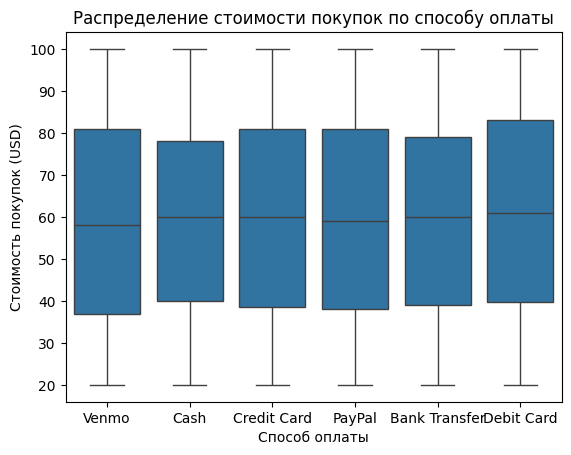

In [10]:
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df)
plt.title('Распределение стоимости покупок по способу оплаты')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Способ оплаты')
plt.show()

**Вывод**: Нет статистически значимой зависимости между способом оплаты и суммой покупки.

**Гипотеза 3**: Существует зависимость между использованием промокодов `Promo Code Used` и суммой покупки `Purchase Amount (USD)`.

In [11]:
hyp = df.groupby('Promo Code Used')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 1.2352, p-value: 0.2665
p-value=0.2665. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


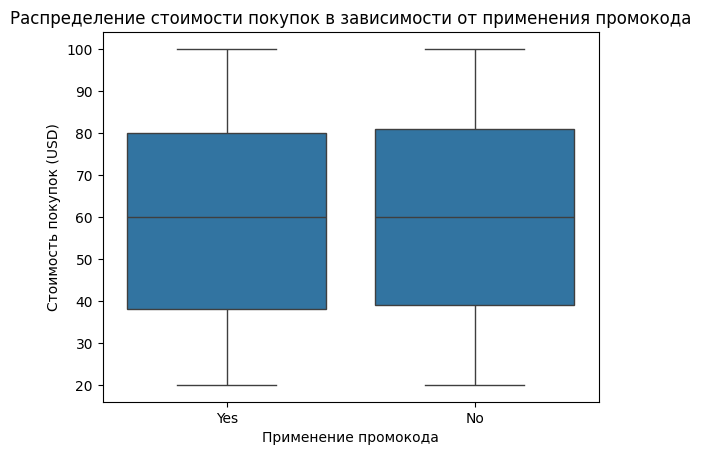

In [12]:
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df)
plt.title('Распределение стоимости покупок в зависимости от применения промокода')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Применение промокода')
plt.show()

**Вывод**: Нет статистически значимой зависимости между использованием промокодов и суммой покупки.

**Гипотеза 4**: Существует зависимость между возрастом покупателя `Age` и суммой покупки `Purchase Amount (USD)`.

In [13]:
corr, p_value = stats.pearsonr(df['Age'], df['Purchase Amount (USD)'])

print(f'Коэффициент корреляции: {corr:.4f}, p-value: {p_value:.4f}')
print(interpret_corr(p_value))

Коэффициент корреляции: -0.0104, p-value: 0.5152
p-value=0.5152. Значение p-value выше уровня значимости (alpha=0.05).
Коэффициент корреляции существенно не отличается от нуля: нет линейной корреляции


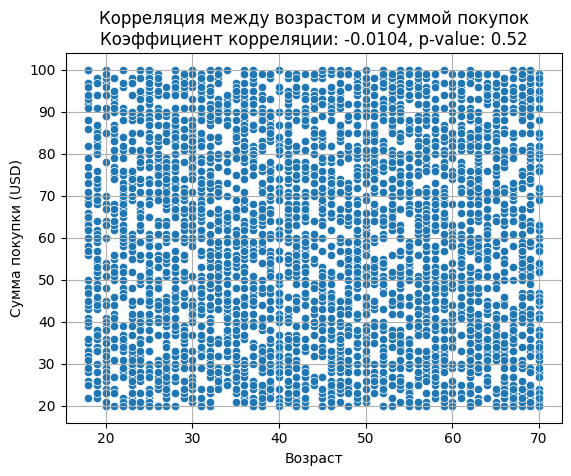

In [14]:
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)')
plt.title(f'Корреляция между возрастом и суммой покупок\nКоэффициент корреляции: {corr:.4f}, p-value: {p_value:.2f}')
plt.xlabel('Возраст')
plt.ylabel('Сумма покупки (USD)')
plt.grid(True)
plt.show()

**Вывод**: Нет линейной корреляции возраста и суммы покупки.

**Гипотеза 5**: Существует зависимость между полом покупателя `Gender` и суммой покупки `Purchase Amount (USD)`.

In [15]:
hyp = df.groupby('Gender')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 0.7690, p-value: 0.3806
p-value=0.3806. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


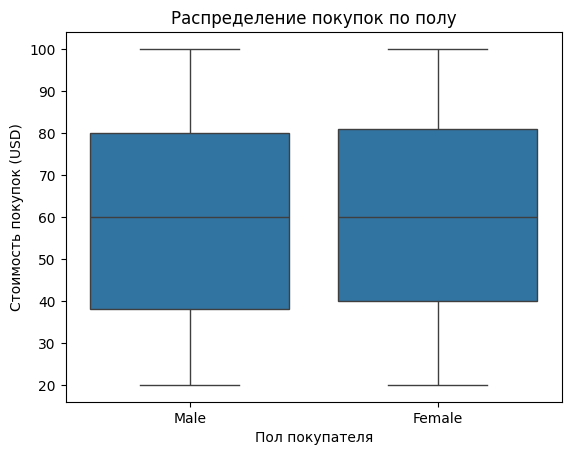

In [16]:
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Распределение покупок по полу')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Пол покупателя')
plt.show()

**Вывод**: Нет статистически значимой зависимости между полом покупателя и суммой покупки.

**Гипотеза 6**: Существует зависимость между местоположением покупателя `Location` и суммой покупок `Purchase Amount (USD)`.

In [17]:
hyp = df.groupby('Location')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 1.2722, p-value: 0.0973
p-value=0.0973. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


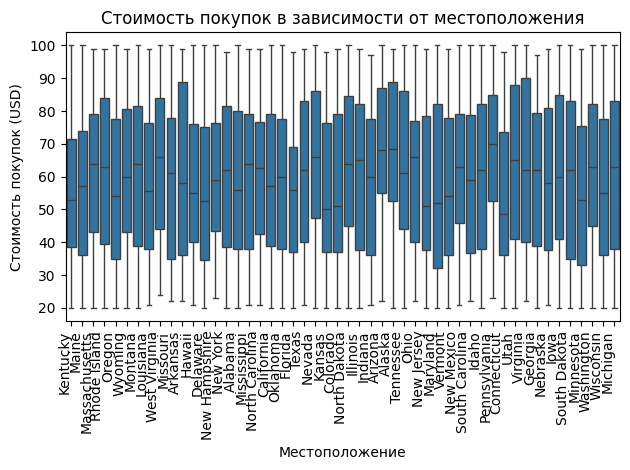

In [18]:
sns.boxplot(x='Location', y='Purchase Amount (USD)', data=df)
plt.title('Стоимость покупок в зависимости от местоположения')
plt.ylabel('Стоимость покупок (USD)')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Местоположение')
plt.tight_layout()
plt.show()

**Вывод**: Нет статистически значимой зависимости между местоположением покупателя и суммой покупки.

**Гипотеза 7**: Существует зависимость между возрастом покупателя `Age` и размером купленного товара `Size`.

In [19]:
hyp = df.groupby('Size')['Age'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 0.7730, p-value: 0.5090
p-value=0.5090. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


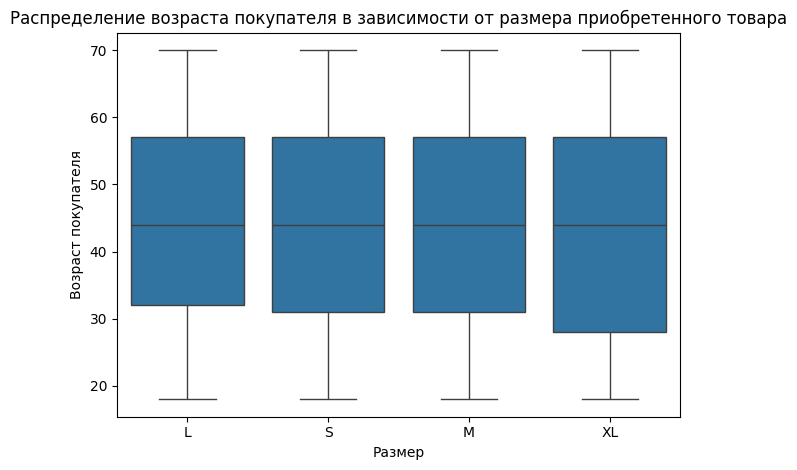

In [20]:
sns.boxplot(x='Size', y='Age', data=df)
plt.title('Распределение возраста покупателя в зависимости от размера приобретенного товара')
plt.ylabel('Возраст покупателя')
plt.xlabel('Размер')
plt.tight_layout()
plt.show()

**Вывод**: Нет статистически значимой зависимости между возрастом покупателя и размером.

**Гипотеза 8**: Существует связь между полом покупателя `Gender` и категорией купленного товара `Category`.

In [21]:
pd.crosstab(df['Category'], df['Gender'])

Gender,Female,Male
Category,,
Accessories,392,848
Clothing,556,1181
Footwear,199,400
Outerwear,101,223


In [22]:
сhi2, p_value, _ , _ = stats.chi2_contingency(pd.crosstab(df['Category'], df['Gender']))

print(f'Chi2: {сhi2:.2f}, p-value: {p_value:.4f}')
print(interpret_chi2(p_value))

Chi2: 0.60, p-value: 0.8968
p-value=0.8968. Значение p-value выше уровня значимости (alpha=0.05).
 Нулевая гипотеза об отсутствии зависимости между группами не отклоняется.


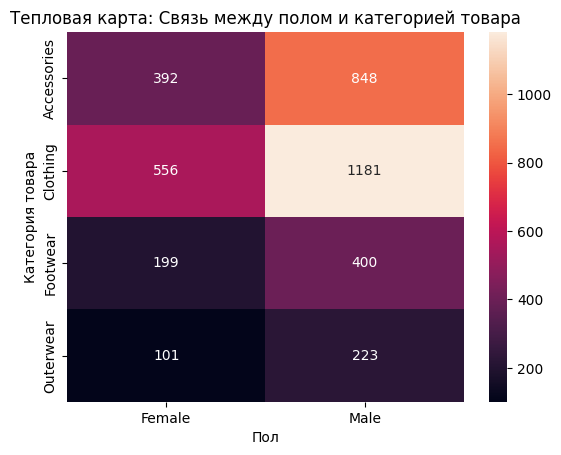

In [23]:
sns.heatmap(pd.crosstab(df['Category'], df['Gender']), annot=True, fmt='d')
plt.title('Тепловая карта: Связь между полом и категорией товара')
plt.ylabel('Категория товара')
plt.xlabel('Пол')
plt.show()

**Вывод**: Нет статистически значимой зависимости между категорией товара и полом покупателя.

**Гипотеза 9**: Существует связь между рейтингом отзыва `Review Rating` и суммой `Purchase Amount (USD)`.

In [24]:
corr, p_value = stats.pearsonr(df['Review Rating'], df['Purchase Amount (USD)'])

print(f'Коэффициент корреляции: {corr:.4f}, p-value: {p_value:.4f}')
print(interpret_corr(p_value))

Коэффициент корреляции: 0.0308, p-value: 0.0546
p-value=0.0546. Значение p-value выше уровня значимости (alpha=0.05).
Коэффициент корреляции существенно не отличается от нуля: нет линейной корреляции


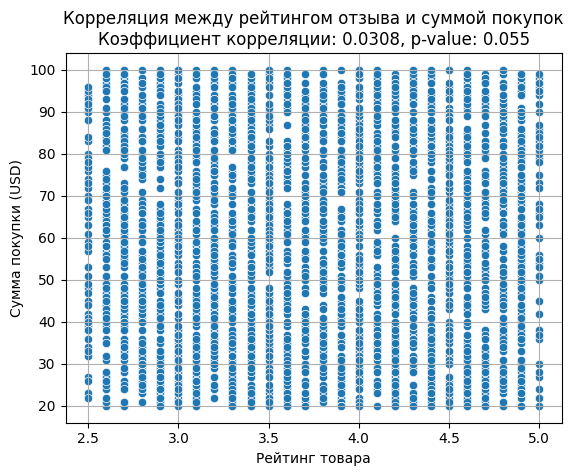

In [25]:
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)')
plt.title(f'Корреляция между рейтингом отзыва и суммой покупок\nКоэффициент корреляции: {corr:.4f}, p-value: {p_value:.3f}')
plt.xlabel('Рейтинг товара')
plt.ylabel('Сумма покупки (USD)')
plt.grid(True)
plt.show()

**Вывод**: нет линейной корреляции между рейтингом отзыва и суммой.

**Гипотеза 10**: Существует связь между категорией купленного товара `Category` и суммой `Purchase Amount (USD)`.

In [26]:
hyp = df.groupby('Category')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.2f}')
print(interpret_anova(p_value))

F statistic: 1.4536, p-value: 0.23
p-value=0.2252. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


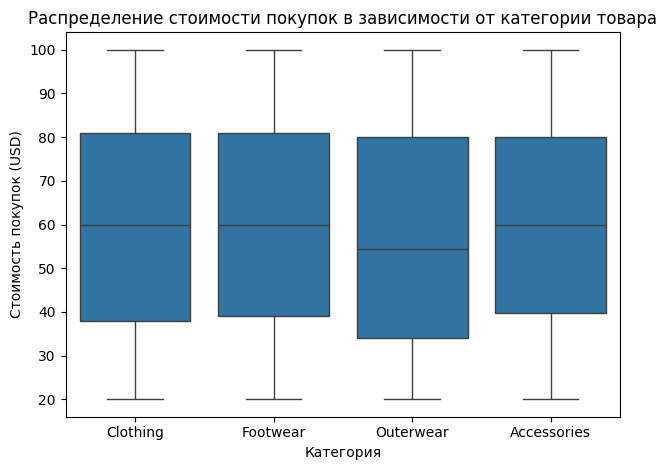

In [27]:
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Распределение стоимости покупок в зависимости от категории товара')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Категория')
plt.tight_layout()
plt.show()

**Вывод**: Нет статистически значимой зависимости между категорией товара и суммой.

**Гипотеза 11**: Существует связь между типом доставки `Shipping Type` и суммой `Purchase Amount (USD)`.

In [28]:
hyp = df.groupby('Shipping Type')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 1.1241, p-value: 0.3451
p-value=0.3451. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


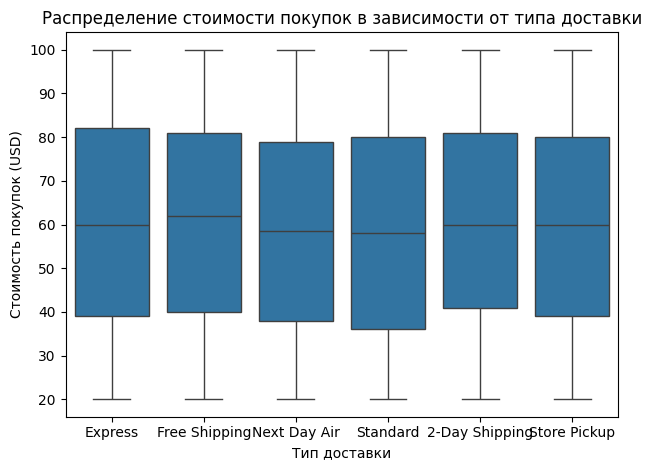

In [29]:
sns.boxplot(x='Shipping Type', y='Purchase Amount (USD)', data=df)
plt.title('Распределение стоимости покупок в зависимости от типа доставки')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Тип доставки')
plt.tight_layout()
plt.show()

**Вывод**: Нет статистически значимой зависимости между типом доставки и суммой.

**Гипотеза 12**: Существует связь между возрастом покупателя `Age` и применением промокода `Promo Code Used`.

In [30]:
hyp = df.groupby('Promo Code Used')['Age'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.4f}')
print(interpret_anova(p_value))

F statistic: 0.0743, p-value: 0.7852
p-value=0.7852. Значение p-value выше уровня значимости (alpha=0.05).
Нулевая гипотеза об отсутствии статистически значимых различий между группами не отклоняется.


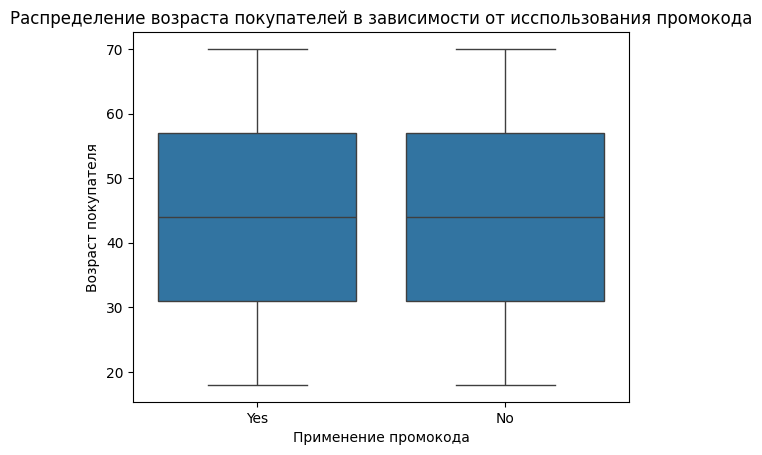

In [31]:
sns.boxplot(x='Promo Code Used', y='Age', data=df)
plt.title('Распределение возраста покупателей в зависимости от исспользования промокода')
plt.ylabel('Возраст покупателя')
plt.xlabel('Применение промокода')
plt.show()

**Вывод**: Нет статистически значимой зависимости между возрастом и применением промокода.

**Гипотеза 13**: Существует связь между сезоном `Season` и суммой `Purchase Amount (USD)`.

In [32]:
hyp = df.groupby('Season')['Purchase Amount (USD)'].apply(list)

f_stat, p_value = stats.f_oneway(*hyp)
print(f'F statistic: {f_stat:.4f}, p-value: {p_value:.2f}')
print(interpret_anova(p_value))

F statistic: 3.7461, p-value: 0.01
p-value=0.0106. Значение p-value ниже уровня значимости (alpha=0.05).
Отвергаем нулевую гипотезу об отсутствии статистически значимых различий между группами в пользу альтернативной.


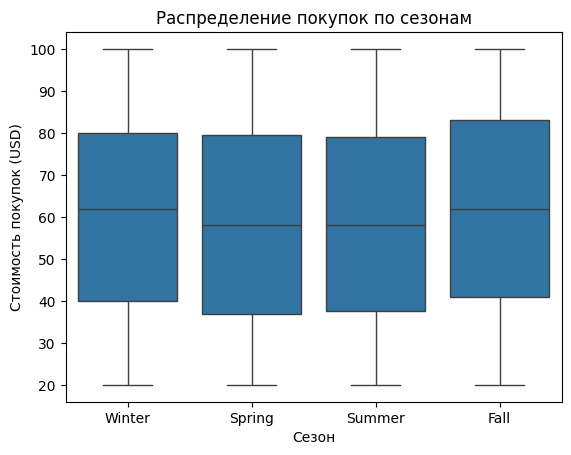

In [33]:
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.title('Распределение покупок по сезонам')
plt.ylabel('Стоимость покупок (USD)')
plt.xlabel('Сезон')
plt.show()

**Вывод**: Существует статистически значимая зависимость между сезоном покупки и суммой.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

1. найдите самый популярный товар


In [34]:
# найдите самый популярный товар

item_counts = df['Item Purchased'].value_counts()
top_items = item_counts.head(5)
top_items

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


**Вывод:** Самыми популярными товарами являются блузки (171), украшения (171), брюки (171).

2. постройте распределение покупателей по полу


In [35]:
# постройте распределение покупателей по полу

gender_counts = df['Gender'].value_counts()
print("Распределение покупателей по полу:", gender_counts)

Распределение покупателей по полу: Gender
Male      2652
Female    1248
Name: count, dtype: int64


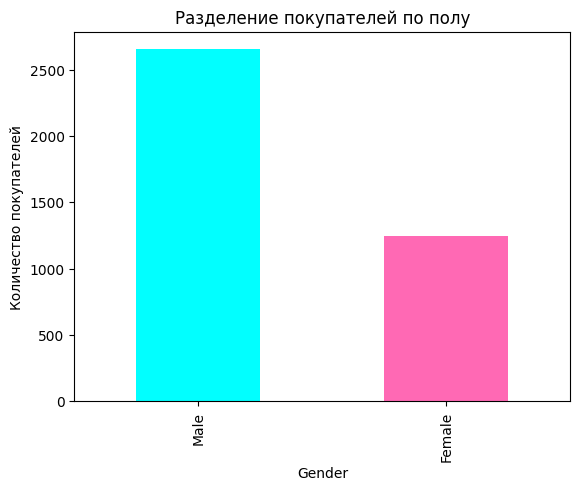

In [36]:
gender_counts.plot(kind='bar', color=['#01FFFF', '#FF69B4'])

plt.title('Разделение покупателей по полу')
plt.ylabel('Количество покупателей')
plt.show()

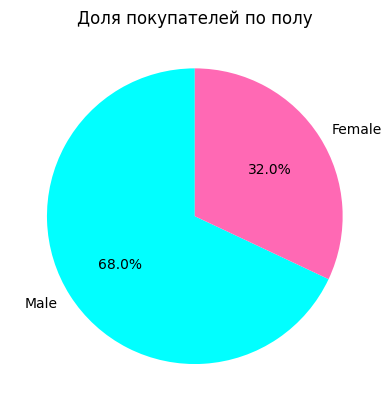

In [37]:
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#01FFFF', '#FF69B4'], startangle=90)
plt.title('Доля покупателей по полу')
plt.ylabel('')
plt.show()

**Вывод:** 32% покупателей - женщины, 68% - мужчины.

3. определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары


In [38]:
# группировка по полу с информацией о самых дорогих покупках, средней сумме покупок, количестве покупок
age_info = df.groupby('Gender')['Purchase Amount (USD)'].agg(
    Max_Purchase='max',
    Mean_Purchase='mean',
    Total_Purchases='count'
).sort_values(by='Max_Purchase', ascending=False)

age_info

,Max_Purchase,Mean_Purchase,Total_Purchases
Gender,,,
Female,100,60.249199,1248
Male,100,59.536199,2652


In [39]:
# группировка по полу и возрасту с информацией о самых дорогих покупках, средней суммой покупок, количестве покупок

gender_age_info = df.groupby(['Gender', 'Age'])['Purchase Amount (USD)'].agg(
    Max_Purchase='max',
    Mean_Purchase='mean',
    Total_Purchases='count'
).sort_values(by='Age')

gender_age_info

Max_Purchase  Mean_Purchase  Total_Purchases
Gender Age                                              
Female 18            100      59.700000               20
Male   18            100      60.102041               49
Female 19             97      62.037037               27
Male   19             98      60.481481               54
Female 20             99      62.250000               12
...                  ...            ...              ...
       68             99      57.818182               22
Male   69            100      61.714286               63
Female 69            100      63.840000               25
       70             98      59.500000               22
Male   70             99      55.577778               45

[106 rows x 3 columns]

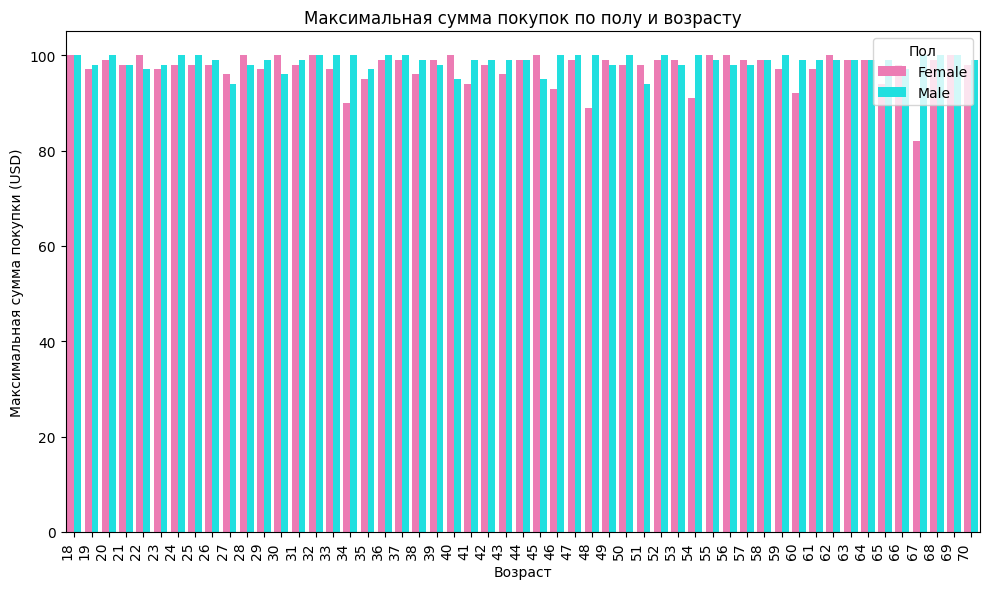

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_info, x='Age', y='Max_Purchase', hue='Gender', palette=['#FF69B4', '#01FFFF'])

plt.title('Максимальная сумма покупок по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Максимальная сумма покупки (USD)')
plt.legend(title='Пол')
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()


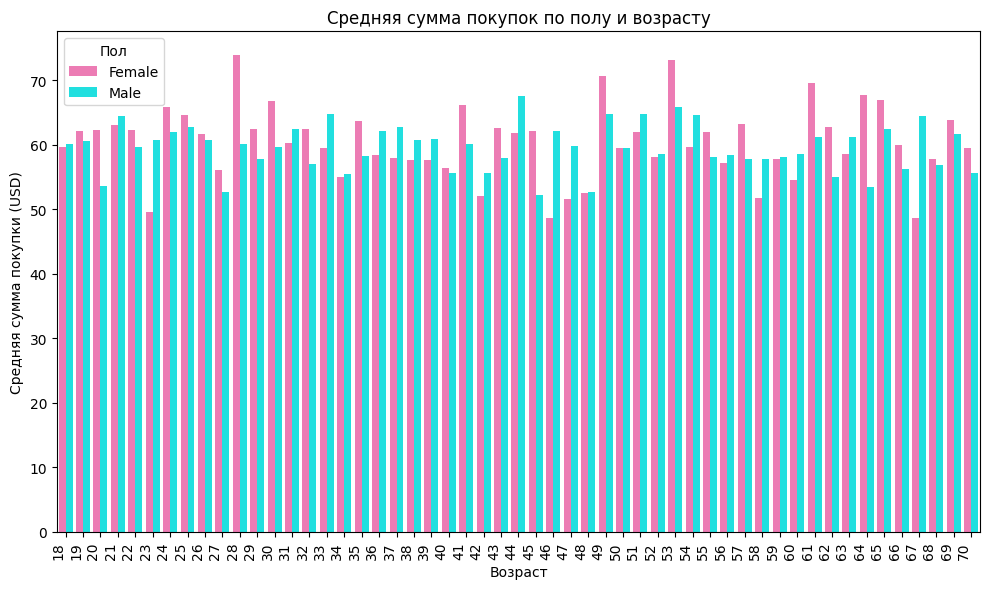

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_info, x='Age', y='Mean_Purchase', hue='Gender', palette=['#FF69B4', '#01FFFF'])

plt.title('Средняя сумма покупок по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средняя сумма покупки (USD)')
plt.legend(title='Пол')
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

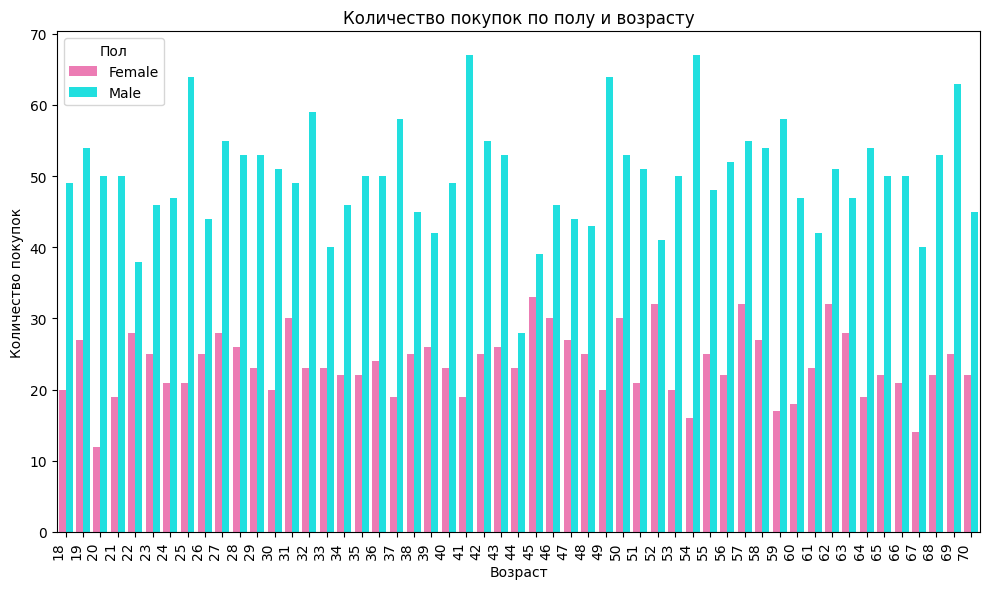

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_info, x='Age', y='Total_Purchases', hue='Gender', palette=['#FF69B4', '#01FFFF'])

plt.title('Количество покупок по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.legend(title='Пол')
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

In [43]:
# характеристика сгруппированных по полу и возрасту покупателей с самыми дорогими покупкими
max_purchases = gender_age_info['Max_Purchase'].max()
gender_age_info[gender_age_info['Max_Purchase'] == max_purchases]

Max_Purchase  Mean_Purchase  Total_Purchases
Gender Age                                              
Female 18            100      59.700000               20
Male   18            100      60.102041               49
       20            100      53.540000               50
Female 22            100      62.285714               28
Male   24            100      61.872340               47
       25            100      62.750000               64
Female 28            100      73.846154               26
       30            100      66.700000               20
Male   32            100      56.966102               59
Female 32            100      62.391304               23
Male   33            100      64.800000               40
       34            100      55.456522               46
       36            100      62.160000               50
       37            100      62.689655               58
Female 40            100      56.434783               23
       45            100      62.060606               33
Male   46            100      62.130435               46
       47            100      59.704545               44
       48            100      52.651163               43
       50            100      59.396226               53
       52            100      58.463415               41
       54            100      64.611940               67
Female 55            100      62.000000               25
       56            100      57.136364               22
Male   59            100      58.034483               58
Female 62            100      62.718750               32
Male   67            100      64.450000               40
       68            100      56.886792               53
       69            100      61.714286               63
Female 69            100      63.840000               25

In [44]:
# характеристика сгруппированных по полу и возрасту покупателей, совершивших самое большое количество покупок

max_total_purchases = gender_age_info['Total_Purchases'].max()
gender_age_info[gender_age_info['Total_Purchases'] == max_total_purchases]

Max_Purchase  Mean_Purchase  Total_Purchases
Gender Age                                              
Male   41             99      60.074627               67
       54            100      64.611940               67

In [45]:
# характеристика сгруппированных по полу и возрасту покупателей с максимальной средней суммой покупок

mean_purchases = gender_age_info['Mean_Purchase'].max()
gender_age_info[gender_age_info['Mean_Purchase'] == mean_purchases]

,,Max_Purchase,Mean_Purchase,Total_Purchases
Gender,Age,,,
Female,28,100,73.846154,26


**Вывод:** Мужчины совершили больше покупок (2652), чем женщины (1248). И у мужчин, и у женщин максимальная сумма покупок составляет 100 USD. Мужчины 41 года и 54 лет совершили максимальное количество покупок (по 67). При этом, в группе мужчин 41 года самая дорогая покупка составила 99 USD, у мужчин 54 лет - 100 USD. Максимальная средняя сумма покупок в группе женщин 28 лет (73.85 USD).

4. определите, есть ли зависимость между цветом одежды и сезоном.


In [46]:
# определите, есть ли зависимость между цветом одежды и сезоном.

сhi2, p_value, _ , _ = stats.chi2_contingency(pd.crosstab(df['Color'], df['Season']))

print(f'Chi2: {сhi2:.2f}, p-value: {p_value:.4f}')
print(interpret_chi2(p_value))

Chi2: 64.65, p-value: 0.7186
p-value=0.7186. Значение p-value выше уровня значимости (alpha=0.05).
 Нулевая гипотеза об отсутствии зависимости между группами не отклоняется.


**Вывод**: Нет статистически значимой связи между цветом одежды и сезоном.

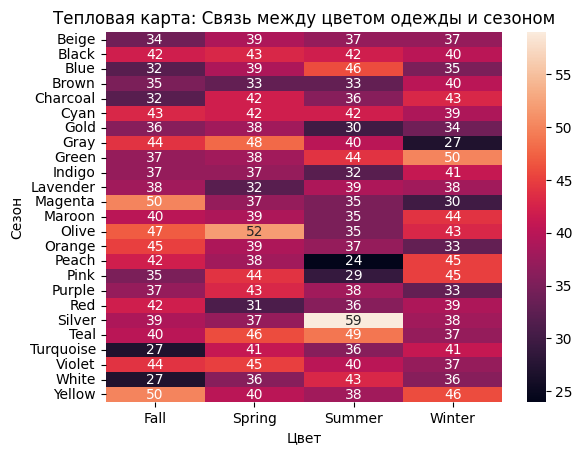

In [47]:
sns.heatmap(pd.crosstab(df['Color'], df['Season']), annot=True, fmt='d')
plt.title('Тепловая карта: Связь между цветом одежды и сезоном')
plt.ylabel('Сезон')
plt.xlabel('Цвет')
plt.show()

5. посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.


In [48]:
# задаю порядок сезонов
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)

In [49]:
#  сезонный mau (уникальных пользователей за сезон)
seasonly_mau = df.groupby('Season', observed=False)['Customer ID'].agg(MAU_Season='count').sort_values(by='Season')
seasonly_mau

,MAU_Season
Season,
Spring,999
Summer,955
Fall,975
Winter,971


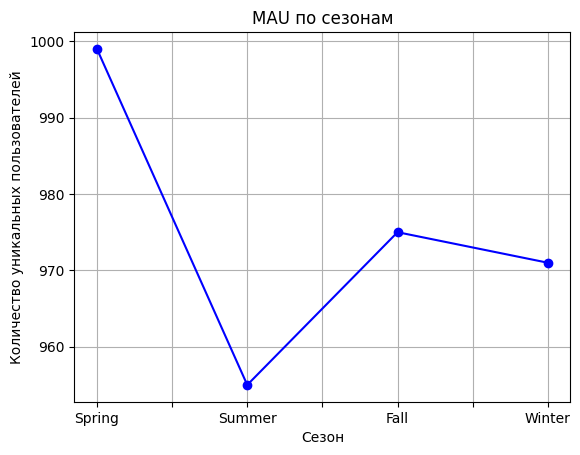

In [50]:
seasonly_mau['MAU_Season'].plot(kind='line', marker='o', color='blue')
plt.title('MAU по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [51]:
# динамика mau (задаю первым значением ноль)
seasonly_mau['MAU_dynamics'] = seasonly_mau['MAU_Season'].diff().fillna(0)
seasonly_mau

,MAU_Season,MAU_dynamics
Season,,
Spring,999,0.0
Summer,955,-44.0
Fall,975,20.0
Winter,971,-4.0


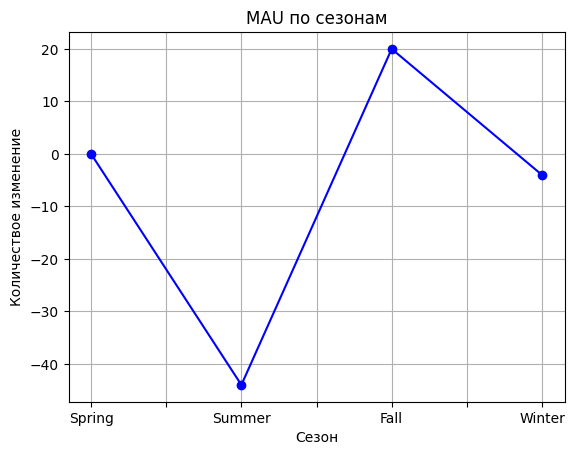

In [52]:
seasonly_mau['MAU_dynamics'].plot(kind='line', marker='o', color='blue')
plt.title('MAU по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количествое изменение')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

6. найдите самую популярную букву в названии одежды.

In [53]:
# найдите самую популярную букву в названии одежды

from collections import Counter

item_names = df['Item Purchased'].str.replace(" ", "", regex=False).str.lower()
letter_counts = Counter(''.join(item_names))
letter_counts

Counter({'b': 772,
         'l': 964,
         'o': 1528,
         'u': 332,
         's': 4063,
         'e': 2347,
         'w': 335,
         'a': 2312,
         't': 1896,
         'r': 1434,
         'j': 458,
         'n': 914,
         'd': 630,
         'k': 911,
         'h': 1081,
         'i': 625,
         'c': 926,
         'g': 454,
         'p': 314,
         'y': 171,
         '-': 147,
         'f': 157,
         'v': 140})

In [54]:
letter, count = letter_counts.most_common(1)[0]
print(f"Самая популярная буква: '{letter}' с количеством: {count}")

Самая популярная буква: 's' с количеством: 4063


In [55]:
# вариант без использования Counter

letter_dict = {}
item_names = df['Item Purchased'].str.replace(" ", "", regex=False).str.lower()

for item in item_names:
    for symbol in item:
        letter_dict[symbol] = letter_dict.get(symbol, 0) + 1

letter_dict

{'b': 772,
 'l': 964,
 'o': 1528,
 'u': 332,
 's': 4063,
 'e': 2347,
 'w': 335,
 'a': 2312,
 't': 1896,
 'r': 1434,
 'j': 458,
 'n': 914,
 'd': 630,
 'k': 911,
 'h': 1081,
 'i': 625,
 'c': 926,
 'g': 454,
 'p': 314,
 'y': 171,
 '-': 147,
 'f': 157,
 'v': 140}

In [56]:
letter, count = letter_counts.most_common(1)[0]
print(f"Самая популярная буква: '{letter}' с количеством: {count}")

Самая популярная буква: 's' с количеством: 4063


<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [58]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [59]:
# страна с наибольшим потреблением пива
beer = df[df['beer_servings'] == df['beer_servings'].max()][['country', 'beer_servings']]
beer

,country,beer_servings
117,Namibia,376


In [60]:
print(f'Страна с наибольшим потреблением пива: {beer.values[0][0]} ({beer.values[0][1]})')

Страна с наибольшим потреблением пива: Namibia (376)


In [61]:
# страна с наибольшим потреблением спиртных напитков
spirit_servings = df[df['spirit_servings'] == df['spirit_servings'].max()][['country', 'spirit_servings']]
spirit_servings

,country,spirit_servings
68,Grenada,438


In [62]:
print(f'Страна с наибольшим потреблением крепкого: {spirit_servings.values[0][0]} ({spirit_servings.values[0][1]})')

Страна с наибольшим потреблением крепкого: Grenada (438)


In [63]:
# страна с наибольшим потреблением вина
wine = df[df['wine_servings'] == df['wine_servings'].max()][['country', 'wine_servings']]
wine

,country,wine_servings
61,France,370


In [64]:
print(f'Страна с наибольшим потреблением вина: {wine.values[0][0]} ({wine.values[0][1]})')

Страна с наибольшим потреблением вина: France (370)


In [65]:
# страны, в которых пьют больше пива, чем другие напитки
countries_with_more_beer = df[
    (df['beer_servings'] > df['wine_servings']) &
    (df['beer_servings'] > df['spirit_servings'])
]

# сортировка по количеству выпитого пива и выбор топ-10
top10_beer_countries = countries_with_more_beer.sort_values(by='beer_servings', ascending=False).head(10)
top10_beer_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
135,Poland,343,215,56,10.9
98,Lithuania,343,244,56,12.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [66]:
print(f'10 стран, в которых пьют больше всего пива, чем другие напитки: {top10_beer_countries["country"].values}')

10 стран, в которых пьют больше всего пива, чем другие напитки: ['Namibia' 'Czech Republic' 'Gabon' 'Germany' 'Poland' 'Lithuania'
 'Venezuela' 'Ireland' 'Palau' 'Romania']


In [67]:
# страны, в которых пьют больше крепкое, чем другие напитки
countries_with_more_spirit = df[
    (df['spirit_servings'] > df['beer_servings']) &
    (df['spirit_servings'] > df['wine_servings'])
]

# сортировка по количеству выпитого крепкого алкоголя и выбор топ-10
top10_spirit_countries = countries_with_more_spirit.sort_values(by='spirit_servings', ascending=False).head(10)
top10_spirit_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
141,Russian Federation,247,326,73,11.5
73,Haiti,1,326,1,5.9
144,St. Lucia,171,315,71,10.1
72,Guyana,93,302,1,7.1
155,Slovakia,196,293,116,11.4
50,Dominica,52,286,26,6.6
169,Thailand,99,258,1,6.4
40,Cook Islands,0,254,74,5.9


In [68]:
print(f'10 стран, в которых пьют больше всего крепкое, чем другие напитки: {top10_spirit_countries["country"].values}')

10 стран, в которых пьют больше всего крепкое, чем другие напитки: ['Grenada' 'Belarus' 'Russian Federation' 'Haiti' 'St. Lucia' 'Guyana'
 'Slovakia' 'Dominica' 'Thailand' 'Cook Islands']


In [69]:
# страны, в которых пьют больше вина, чем другие напитки
countries_with_more_wine = df[
    (df['wine_servings'] > df['beer_servings']) &
    (df['wine_servings'] > df['spirit_servings'])
]

# сортировка по количеству выпитого вина и выбор топ-10
top10_wine_countries = countries_with_more_wine.sort_values(by='wine_servings', ascending=False).head(10)
top10_wine_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [70]:
print(f'10 стран, в которых пьют больше всего вина, чем другие напитки: {top10_wine_countries["country"].values}')

10 стран, в которых пьют больше всего вина, чем другие напитки: ['France' 'Portugal' 'Andorra' 'Switzerland' 'Denmark' 'Slovenia'
 'Luxembourg' 'Croatia' 'Italy' 'Equatorial Guinea']


In [71]:
# 50 стран с самым высоким абсолютным потреблением алкоголя

df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

top_50_drinking_countries = df.nlargest(50, 'total_servings')
top_50_drinking_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_servings
3,Andorra,245,138,312,12.4,695
45,Czech Republic,361,170,134,11.8,665
68,Grenada,199,438,28,11.9,665
61,France,127,151,370,11.8,648
141,Russian Federation,247,326,73,11.5,646
98,Lithuania,343,244,56,12.9,643
99,Luxembourg,236,133,271,11.4,640
65,Germany,346,117,175,11.3,638
75,Hungary,234,215,185,11.3,634
135,Poland,343,215,56,10.9,614


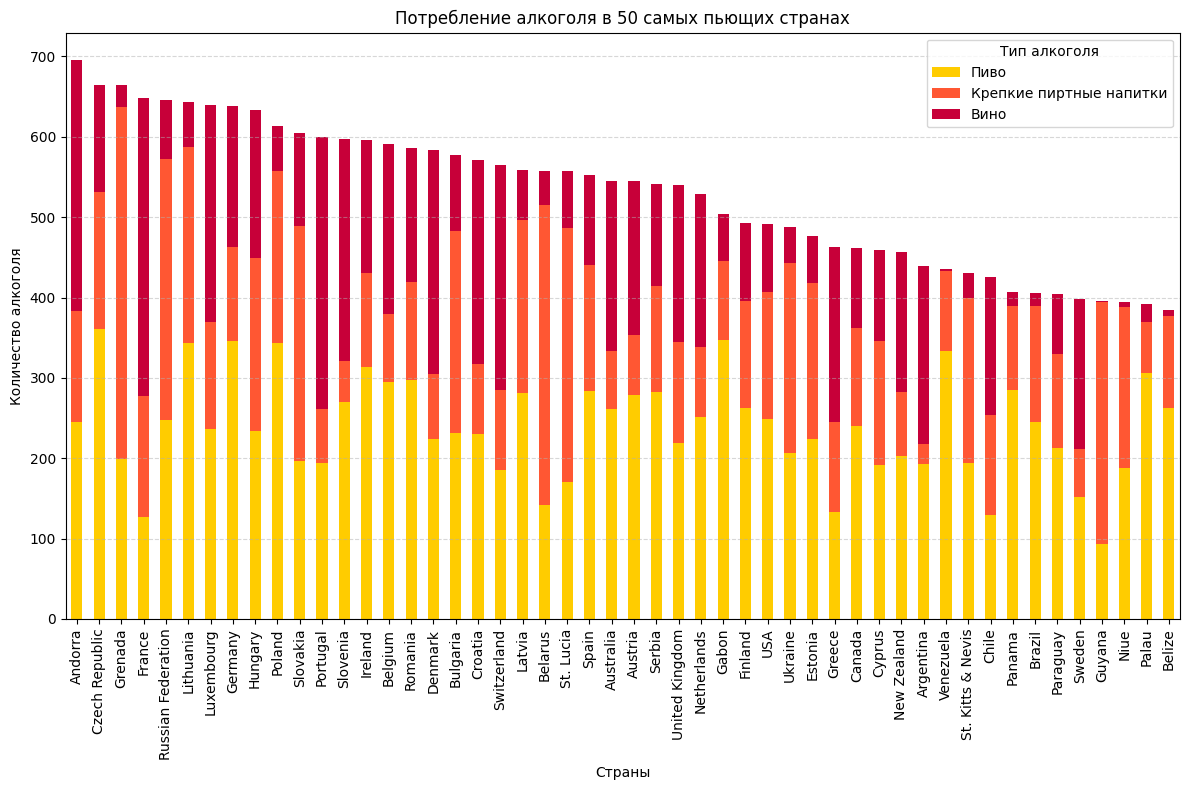

In [72]:
ax = top_50_drinking_countries[['country', 'beer_servings', 'spirit_servings', 'wine_servings']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FFCC00', '#FF5733', '#C70039'])
plt.title('Потребление алкоголя в 50 самых пьющих странах')
plt.xlabel('Страны')
plt.ylabel('Количество алкоголя')
plt.xticks(rotation=45)
plt.legend(title='Тип алкоголя', labels=['Пиво', 'Крепкие пиртные напитки', 'Вино'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(top_50_drinking_countries['country'], rotation=90)
plt.tight_layout()
plt.show()

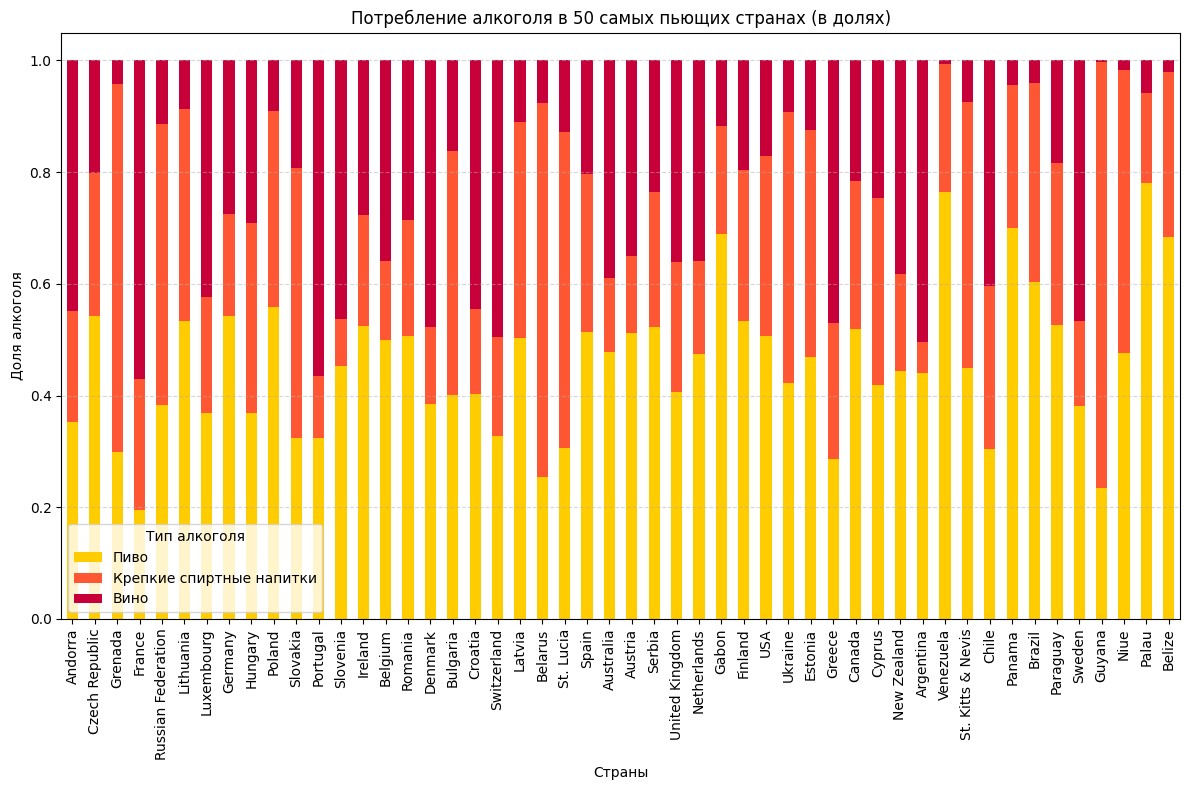

In [73]:
# посчитаю в долях потребление алкоголя в каждой стране
top_50_drinking_countries1 = top_50_drinking_countries[['beer_servings', 'spirit_servings', 'wine_servings']].div(top_50_drinking_countries['total_servings'], axis=0)
top_50_drinking_countries1['country'] = top_50_drinking_countries['country']

ax = top_50_drinking_countries1[['country', 'beer_servings', 'spirit_servings', 'wine_servings']].set_index('country').plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FFCC00', '#FF5733', '#C70039'])
plt.title('Потребление алкоголя в 50 самых пьющих странах (в долях)')
plt.xlabel('Страны')
plt.ylabel('Доля алкоголя')
plt.xticks(rotation=90)
plt.legend(title='Тип алкоголя', labels=['Пиво', 'Крепкие спиртные напитки', 'Вино'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [75]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


1. число проклятий, летальных исходов и их соотношение по фильмам

In [76]:
# число проклятий, летальных исходов
df['type'].value_counts()

,count
type,
word,1704
death,190


Всего в фильмах 190 смертей и 1704 слов-проклятий.


In [77]:
# число слов-проклятий, смертей по фильмам
result = df.groupby(['movie', 'type']).size().unstack()
result

type,death,word
movie,,
Django Unchained,47,262
Inglorious Basterds,48,58
Jackie Brown,4,368
Kill Bill: Vol. 1,63,57
Kill Bill: Vol. 2,11,69
Pulp Fiction,7,469
Reservoir Dogs,10,421


In [78]:
# посчитаю соотношение смертей и слов-проклятий по фильмам
result['death_ratio'] =  result['death']/(result['word']+result['death'])
result['word_ratio'] =  result['word']/(result['word']+result['death'])
result

type,death,word,death_ratio,word_ratio
movie,,,,
Django Unchained,47,262,0.152104,0.847896
Inglorious Basterds,48,58,0.452830,0.547170
Jackie Brown,4,368,0.010753,0.989247
Kill Bill: Vol. 1,63,57,0.525000,0.475000
Kill Bill: Vol. 2,11,69,0.137500,0.862500
Pulp Fiction,7,469,0.014706,0.985294
Reservoir Dogs,10,421,0.023202,0.976798


In [79]:
for movie in result.index:
    deaths = result.loc[movie, 'death']
    words = result.loc[movie, 'word']

    print(f"Фильм: {movie}")
    print(f"  Смертей: {deaths}, слов-проклятий: {words}, соотношение смертей и проклятий: {deaths/words:.2f}")
    print()

Фильм: Django Unchained
  Смертей: 47, слов-проклятий: 262, соотношение смертей и проклятий: 0.18

Фильм: Inglorious Basterds
  Смертей: 48, слов-проклятий: 58, соотношение смертей и проклятий: 0.83

Фильм: Jackie Brown
  Смертей: 4, слов-проклятий: 368, соотношение смертей и проклятий: 0.01

Фильм: Kill Bill: Vol. 1
  Смертей: 63, слов-проклятий: 57, соотношение смертей и проклятий: 1.11

Фильм: Kill Bill: Vol. 2
  Смертей: 11, слов-проклятий: 69, соотношение смертей и проклятий: 0.16

Фильм: Pulp Fiction
  Смертей: 7, слов-проклятий: 469, соотношение смертей и проклятий: 0.01

Фильм: Reservoir Dogs
  Смертей: 10, слов-проклятий: 421, соотношение смертей и проклятий: 0.02



2. частота употребления конкретных слов-проклятий

In [80]:
result2 = df['word'].value_counts().reset_index()
result2

,word,count
0,fucking,407
1,shit,221
2,fuck,213
3,n-word,179
4,ass,140
5,goddamn,113
6,motherfucker,70
7,bitch,64
8,hell,45
9,damn,37


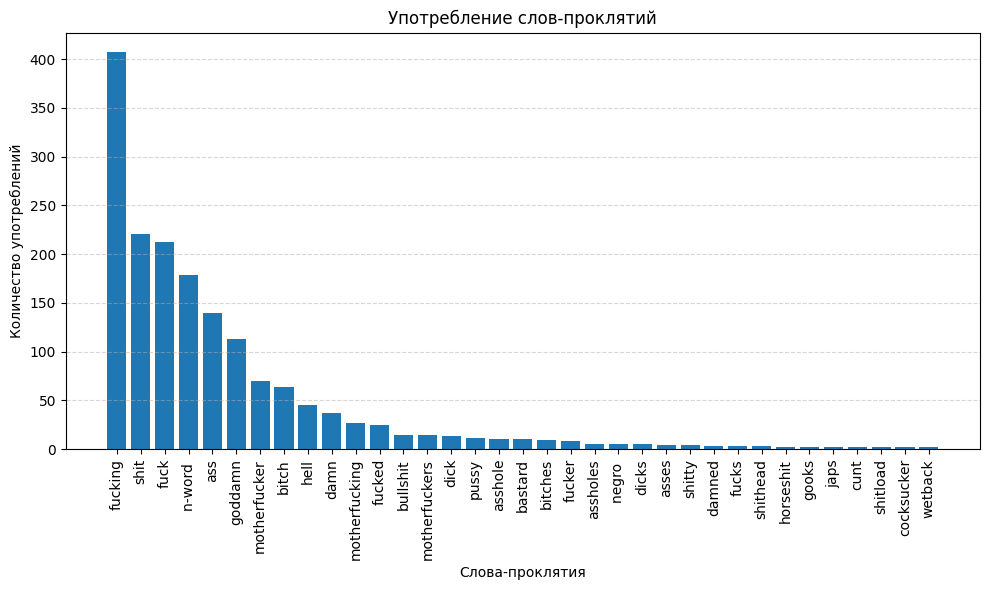

In [91]:
plt.figure(figsize=(10, 6))
# на графике буду отображать только слова, встречающиеся больше 1 раза
plt.bar(result2['word'][result2['count'] > 1], result2['count'][result2['count'] > 1])
plt.xlabel('Слова-проклятия')
plt.ylabel('Количество употреблений')
plt.title('Употребление слов-проклятий')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [82]:
# всего проклятий во всех фильмах
total_words = df['word'].value_counts().sum()
total_words

1704

In [83]:
# добавлю подсчет частоты употребления слов-проклятий относительно всех проклятий
result2['percentages'] =  result2['count']/total_words * 100
result2

,word,count,percentages
0,fucking,407,23.884977
1,shit,221,12.969484
2,fuck,213,12.500000
3,n-word,179,10.504695
4,ass,140,8.215962
5,goddamn,113,6.631455
6,motherfucker,70,4.107981
7,bitch,64,3.755869
8,hell,45,2.640845
9,damn,37,2.171362


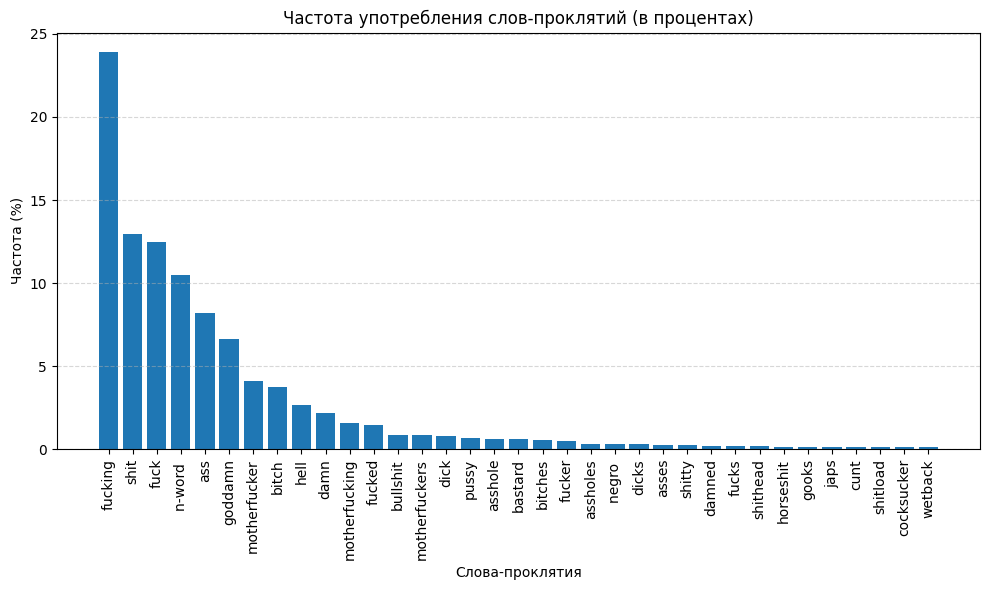

In [84]:
plt.figure(figsize=(10, 6))
# на графике буду отображать только слова, встречающиеся больше 1 раза
plt.bar(result2['word'][result2['count'] > 1], result2['percentages'][result2['count'] > 1])
plt.xlabel('Слова-проклятия')
plt.ylabel('Частота (%)')
plt.title('Частота употребления слов-проклятий (в процентах)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

3. распределение времени между проклятиями

In [85]:
result3 = df.copy()
# выберу из датасета только строки с проклятьями
result3 = result3[result3['type'] == 'word']
# добавлю сортировку, чтобы не получалась отрицательная разница во времени
result3 = result3.sort_values(by=['movie', 'minutes_in'])
# вычисление разницы во времени между словами
result3['time_difference'] = result3.groupby('movie')['minutes_in'].diff()

In [86]:
# в каждом фильме у первого проклятья time_difference = NaN
result3['time_difference'].isna().sum()

7

In [87]:
# time_difference первого проклятья в каждом фильме NaN, заменю на 0
result3['time_difference'] = result3['time_difference'].fillna(0)

In [88]:
result3

,movie,type,word,minutes_in,time_difference
1213,Django Unchained,word,goddamn,7.23,0.00
1215,Django Unchained,word,goddamn,8.37,1.14
1216,Django Unchained,word,bitch,8.38,0.01
1217,Django Unchained,word,damn,8.65,0.27
1218,Django Unchained,word,fucking,8.87,0.22
...,...,...,...,...,...
424,Reservoir Dogs,word,fucking,94.83,0.08
425,Reservoir Dogs,word,fucking,94.90,0.07
426,Reservoir Dogs,word,fucking,95.21,0.31
427,Reservoir Dogs,word,fucking,95.33,0.12


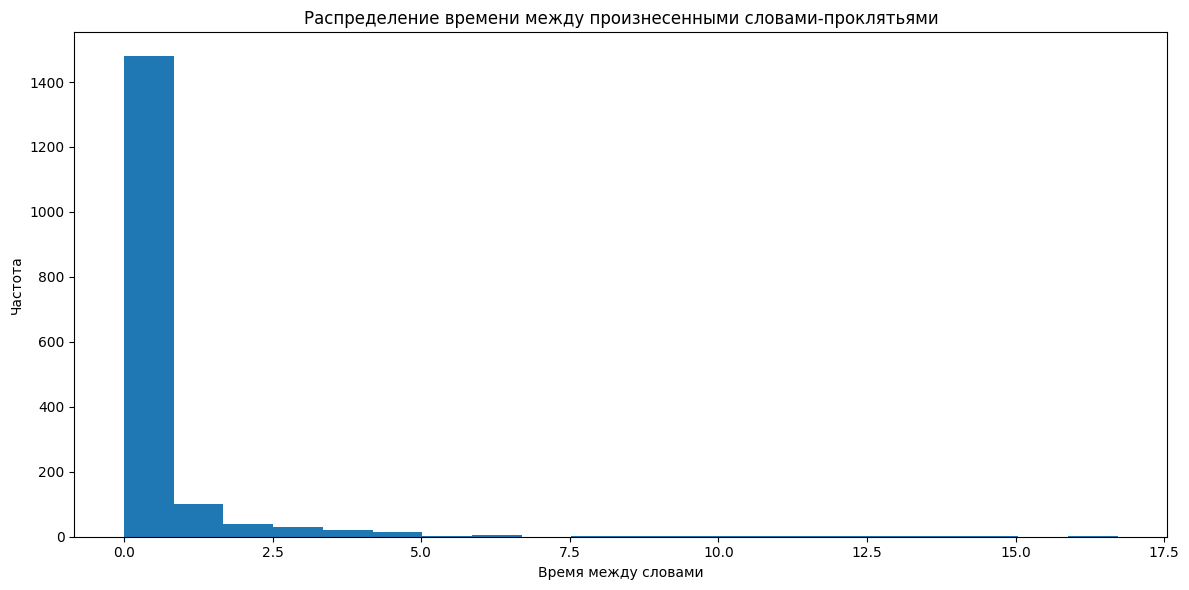

In [89]:
plt.figure(figsize=(12, 6))
plt.hist(result3['time_difference'], bins=20)
plt.xlabel('Время между словами')
plt.ylabel('Частота')
plt.title('Распределение времени между произнесенными словами-проклятьями')
plt.tight_layout()
plt.show()

In [90]:
result3['time_difference'].describe()

,time_difference
count,1704.000000
mean,0.511802
std,1.372220
min,0.000000
25%,0.040000
50%,0.100000
75%,0.370000
max,16.720000
